In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV files into DataFrames
df1 = pd.read_csv('questionnaire.csv')
df2 = pd.read_csv('demographic.csv')
df3 = pd.read_csv('diet.csv')
df4 = pd.read_csv('examination.csv')

# Merge the DataFrames on the 'seqn' column
merged_df = df1.merge(df2, on='SEQN').merge(df3, on='SEQN').merge(df4, on='SEQN')

# Print the merged DataFrame
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(merged_df.shape)


(10175, 953)
(10175, 47)
(9813, 168)
(9813, 224)
(9813, 1389)


In [38]:
# List of columns to keep
columns_to_keep = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'BPXDI1', 'BPXDI3', 'BPXSY1', 'BPXSY3', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'DR1TCHOL',
    'DRQSDIET', 'DRQSPREP', 'MCQ010', 'MCQ160F',
    'PAQ650', 'PAQ665', 'DPQ090', 'DPQ060', 'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020','ALQ151', 'ALQ120Q', 'SMQ020', 'DBQ700', 'HSD010', 'SLD010H', 'BPQ080'
]

# Drop all columns except for the specified ones
merged_df = merged_df[columns_to_keep]

# Drop all rows where RIDAGEYR is less than 18
merged_df = merged_df[merged_df['RIDAGEYR'] >= 18]

merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,BPXDI1,BPXDI3,BPXSY1,BPXSY3,BMXBMI,BMXHT,BMXWAIST,...,DPQ040,DPQ030,DPQ020,ALQ151,ALQ120Q,SMQ020,DBQ700,HSD010,SLD010H,BPQ080
0,73557,1,69,72.0,74.0,122.0,102.0,26.7,171.3,100.0,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,7.0,1.0
1,73558,1,54,62.0,42.0,156.0,156.0,28.6,176.8,107.6,...,0.0,0.0,0.0,1.0,7.0,1.0,3.0,4.0,9.0,1.0
2,73559,1,72,90.0,80.0,140.0,146.0,28.9,175.3,109.2,...,0.0,0.0,0.0,2.0,0.0,1.0,3.0,3.0,8.0,1.0
4,73561,2,73,86.0,86.0,136.0,142.0,19.7,162.4,NaN,...,3.0,0.0,1.0,2.0,0.0,2.0,2.0,5.0,9.0,2.0
5,73562,1,56,84.0,80.0,160.0,154.0,41.7,158.7,123.1,...,3.0,3.0,3.0,2.0,5.0,1.0,5.0,5.0,5.0,1.0


In [39]:
merged_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
BPXDI1       498
BPXDI3       300
BPXSY1       498
BPXSY3       300
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
DR1TCHOL     568
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
PAQ650         0
PAQ665         0
DPQ090       531
DPQ060       530
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ151      1447
ALQ120Q     1445
SMQ020         0
DBQ700         0
HSD010       480
SLD010H        3
BPQ080         0
dtype: int64

In [40]:
merged_df.notnull().sum()

SEQN        5924
RIAGENDR    5924
RIDAGEYR    5924
BPXDI1      5426
BPXDI3      5624
BPXSY1      5426
BPXSY3      5624
BMXBMI      5847
BMXHT       5857
BMXWAIST    5587
BMXWT       5860
DR1TCHOL    5356
DRQSDIET    5396
DRQSPREP    5396
MCQ010      5924
MCQ160F     5588
PAQ650      5924
PAQ665      5924
DPQ090      5393
DPQ060      5394
DPQ050      5395
DPQ040      5395
DPQ030      5395
DPQ020      5396
ALQ151      4477
ALQ120Q     4479
SMQ020      5924
DBQ700      5924
HSD010      5444
SLD010H     5921
BPQ080      5924
dtype: int64

In [41]:
# Drop all columns with less than 4000 non-null values
merged_df = merged_df.dropna(thresh=4000, axis=1)

# Print the resulting DataFrame
print(merged_df)

       SEQN  RIAGENDR  RIDAGEYR  BPXDI1  BPXDI3  BPXSY1  BPXSY3  BMXBMI  \
0     73557         1        69    72.0    74.0   122.0   102.0    26.7   
1     73558         1        54    62.0    42.0   156.0   156.0    28.6   
2     73559         1        72    90.0    80.0   140.0   146.0    28.9   
4     73561         2        73    86.0    86.0   136.0   142.0    19.7   
5     73562         1        56    84.0    80.0   160.0   154.0    41.7   
...     ...       ...       ...     ...     ...     ...     ...     ...   
9804  83723         1        61     NaN    68.0     NaN   142.0    33.1   
9805  83724         1        80    70.0    66.0   164.0   168.0    24.9   
9807  83726         1        40     NaN     NaN     NaN     NaN    26.8   
9808  83727         1        26    68.0    76.0   110.0   112.0    24.5   
9810  83729         2        42    82.0    80.0   136.0   138.0    34.0   

      BMXHT  BMXWAIST  ...  DPQ040  DPQ030  DPQ020  ALQ151  ALQ120Q  SMQ020  \
0     171.3     100.

In [42]:
# Assuming merged_df is already defined

# Count the number of rows with any null values
rows_with_nulls = merged_df.isnull().any(axis=1).sum()

# Print the number of rows with any null values
print(f"Number of rows with any null values: {rows_with_nulls}")

Number of rows with any null values: 2256


In [43]:
# Rename the columns as specified
new_column_names = {
    'SEQN': 'ID',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'BPXDI1': 'DiasBP1',
    'BPXDI3': 'DiasBP2',
    'BPXSY1': 'SysBP1',
    'BPXSY3': 'SysBP2',
    'PEASCST1': 'BPStatus',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWAIST': 'Waist',
    'BMXWT': 'Weight',
    'DR1TCHOL': 'CholLvl',
    'DRQSDIET': 'Diet',
    'DRQSPREP': 'SaltFreq',
    'MCQ010': 'Asthema',
    'MCQ160F': 'Stroke',
    'PAQ650': 'VigActivity',
    'PAQ665': 'ModActivity',
    'DPQ090': 'FeelSuicidal',
    'DPQ060': 'FeelLetDown',
    'DPQ050': 'FeelPoorEating',
    'DPQ040': 'FeelTired',
    'DPQ030': 'SleepTroubles',
    'DPQ020': 'FeelDep',
    'ALQ151': 'AlcConsumpInLife',
    'ALQ120Q': 'AlcConsumpFreq',
    'SMQ020': '100Cigs',
    'DBQ700': 'OvrDietHealth',
    'HSD010': 'GenHealth',
    'SLD010H': 'SleepDuringWork',
    'BPQ080': 'CholesterolHighDr'
}

merged_df.rename(columns=new_column_names, inplace=True)

# Show the first few rows to verify the changes
merged_df.head()

,ID,Gender,Age,DiasBP1,DiasBP2,SysBP1,SysBP2,BMI,Height,Waist,...,FeelTired,SleepTroubles,FeelDep,AlcConsumpInLife,AlcConsumpFreq,100Cigs,OvrDietHealth,GenHealth,SleepDuringWork,CholesterolHighDr
0,73557,1,69,72.0,74.0,122.0,102.0,26.7,171.3,100.0,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,7.0,1.0
1,73558,1,54,62.0,42.0,156.0,156.0,28.6,176.8,107.6,...,0.0,0.0,0.0,1.0,7.0,1.0,3.0,4.0,9.0,1.0
2,73559,1,72,90.0,80.0,140.0,146.0,28.9,175.3,109.2,...,0.0,0.0,0.0,2.0,0.0,1.0,3.0,3.0,8.0,1.0
4,73561,2,73,86.0,86.0,136.0,142.0,19.7,162.4,NaN,...,3.0,0.0,1.0,2.0,0.0,2.0,2.0,5.0,9.0,2.0
5,73562,1,56,84.0,80.0,160.0,154.0,41.7,158.7,123.1,...,3.0,3.0,3.0,2.0,5.0,1.0,5.0,5.0,5.0,1.0


In [44]:
merged_df.shape

(5924, 31)

In [45]:
# Remove records where the person is under 20 years old
merged_df = merged_df[merged_df['Age'] >= 20]

# Show new shape
merged_df.shape

(5588, 31)

In [46]:
#Add Hypertension Feature
merged_df['Hypertension'] = ((merged_df['SysBP1'] >= 130) | (merged_df['SysBP2'] >= 130) |
                                 (merged_df['DiasBP1'] >= 80) | (merged_df['DiasBP2'] >= 80)).astype(int)
merged_df.head()

,ID,Gender,Age,DiasBP1,DiasBP2,SysBP1,SysBP2,BMI,Height,Waist,...,SleepTroubles,FeelDep,AlcConsumpInLife,AlcConsumpFreq,100Cigs,OvrDietHealth,GenHealth,SleepDuringWork,CholesterolHighDr,Hypertension
0,73557,1,69,72.0,74.0,122.0,102.0,26.7,171.3,100.0,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,7.0,1.0,0
1,73558,1,54,62.0,42.0,156.0,156.0,28.6,176.8,107.6,...,0.0,0.0,1.0,7.0,1.0,3.0,4.0,9.0,1.0,1
2,73559,1,72,90.0,80.0,140.0,146.0,28.9,175.3,109.2,...,0.0,0.0,2.0,0.0,1.0,3.0,3.0,8.0,1.0,1
4,73561,2,73,86.0,86.0,136.0,142.0,19.7,162.4,NaN,...,0.0,1.0,2.0,0.0,2.0,2.0,5.0,9.0,2.0,1
5,73562,1,56,84.0,80.0,160.0,154.0,41.7,158.7,123.1,...,3.0,3.0,2.0,5.0,1.0,5.0,5.0,5.0,1.0,1


In [47]:
hypertension_count = merged_df['Hypertension'].sum()
hypertension_count/5588*100

42.41231209735147

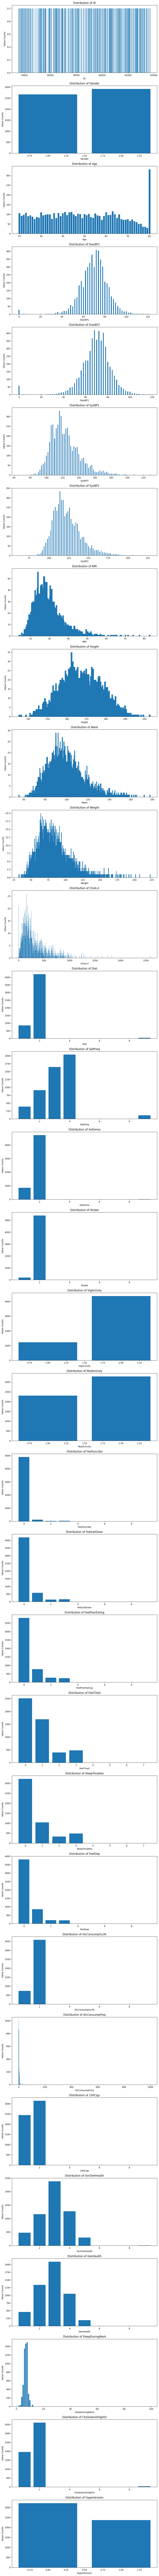

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined

# List of features to plot
features = merged_df.columns

# Create subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# Plot each feature's value counts
for i, feature in enumerate(features):
    value_counts = merged_df[feature].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value Counts')
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [49]:
# # Assuming merged_df is already defined

# # Filter rows where BPXDI3 > 90 or BPDSY3 > 130 and PEASCST1 is 1
# filtered_rows = merged_df[((merged_df['BPXDI3'] > 90) | (merged_df['BPXSY3'] > 130)) & (merged_df['PEASCST1'] == 1)]

# # Print the filtered rows
# print(filtered_rows)

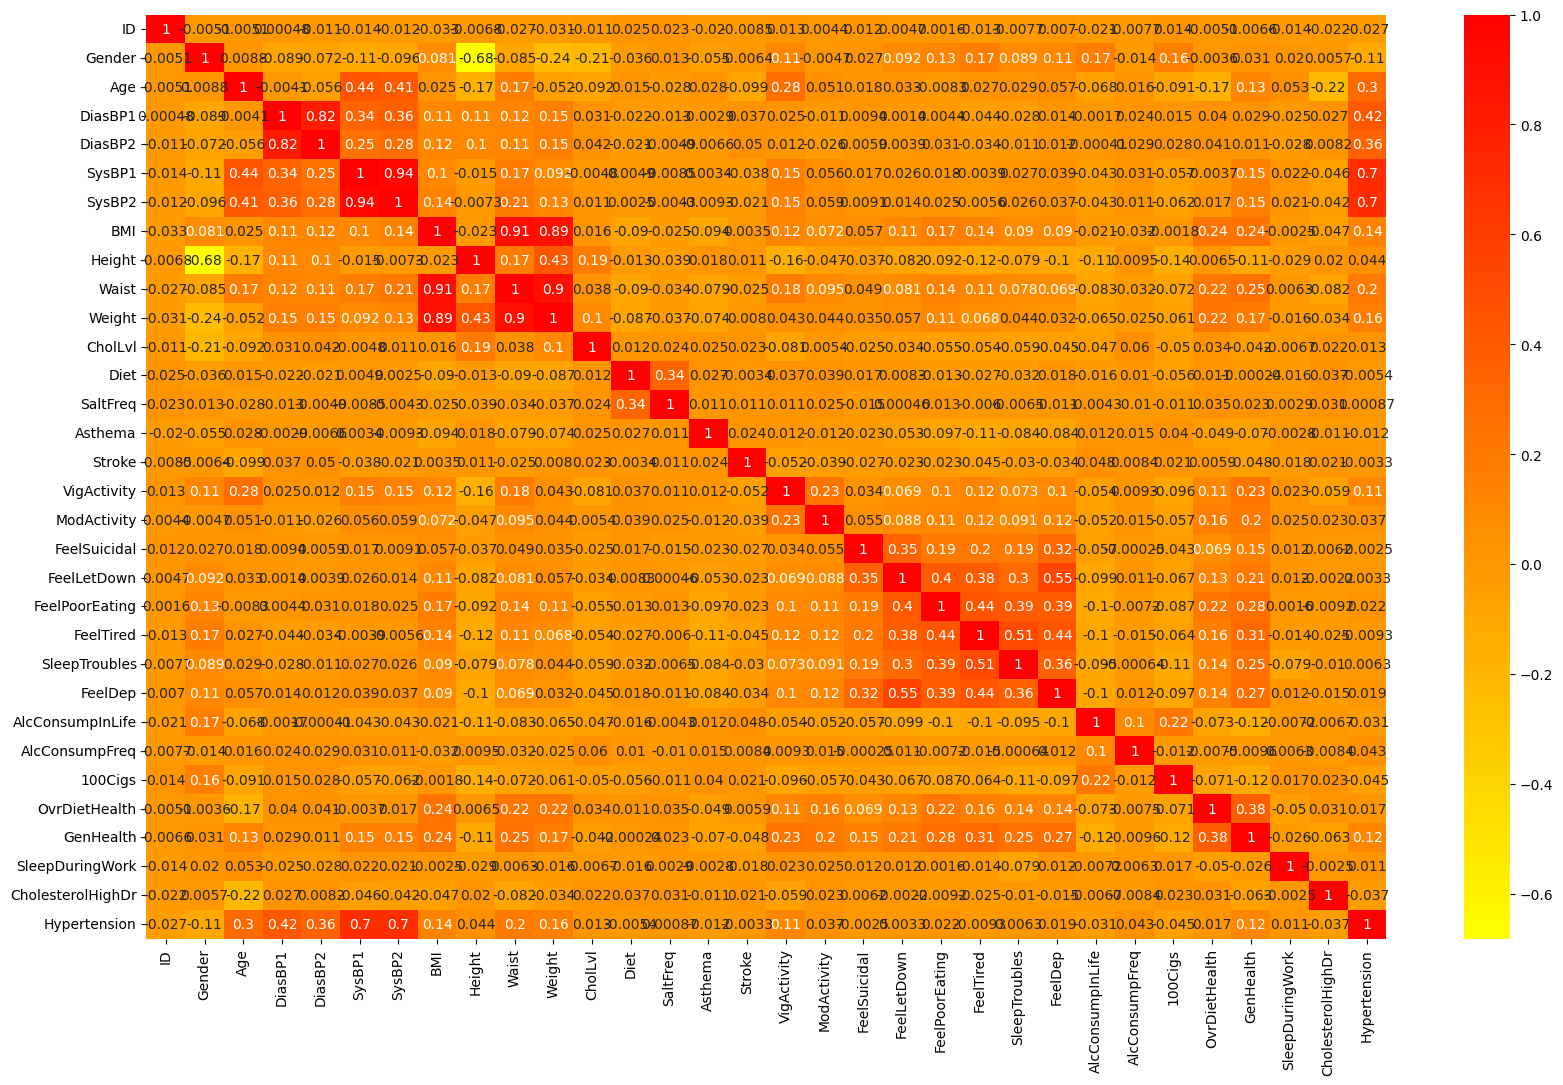

In [50]:
plt.figure(figsize=(20,12))
sns.heatmap(merged_df.corr(),annot=True,cmap="autumn_r")
plt.show()

In [51]:
# Function to plot side-by-side bar graphs for a given column
def plot_highbp_percentages(column_name):
    unique_values = sorted(merged_df[column_name].unique())
    percentages_df = pd.DataFrame()

    for value in unique_values:
        counts = merged_df[merged_df[column_name] == value]['Hypertension'].value_counts(normalize=True) * 100
        percentages_df[value] = counts

    percentages_df = percentages_df.T

    percentages_df.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Percentage of HighBP')
    plt.title(f'Side-by-Side Bar Graph of HighBP Percentages for Each {column_name} Value')
    plt.legend(title='HighBP')
    plt.show()

In [52]:
merged_df.columns

Index(['ID', 'Gender', 'Age', 'DiasBP1', 'DiasBP2', 'SysBP1', 'SysBP2', 'BMI',
       'Height', 'Waist', 'Weight', 'CholLvl', 'Diet', 'SaltFreq', 'Asthema',
       'Stroke', 'VigActivity', 'ModActivity', 'FeelSuicidal', 'FeelLetDown',
       'FeelPoorEating', 'FeelTired', 'SleepTroubles', 'FeelDep',
       'AlcConsumpInLife', 'AlcConsumpFreq', '100Cigs', 'OvrDietHealth',
       'GenHealth', 'SleepDuringWork', 'CholesterolHighDr', 'Hypertension'],
      dtype='object')

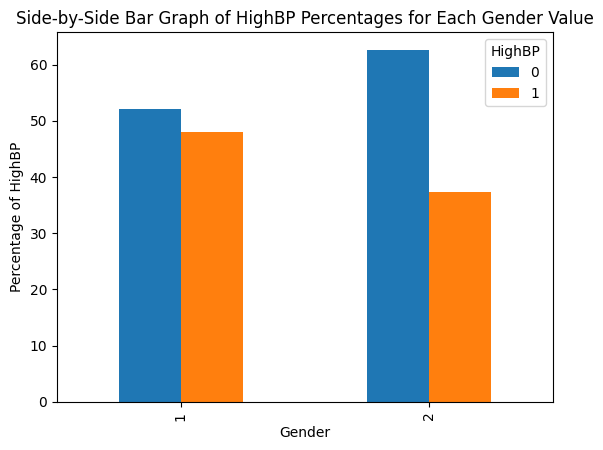

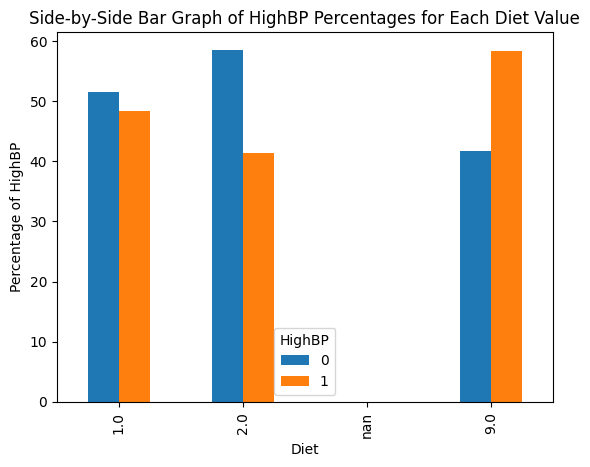

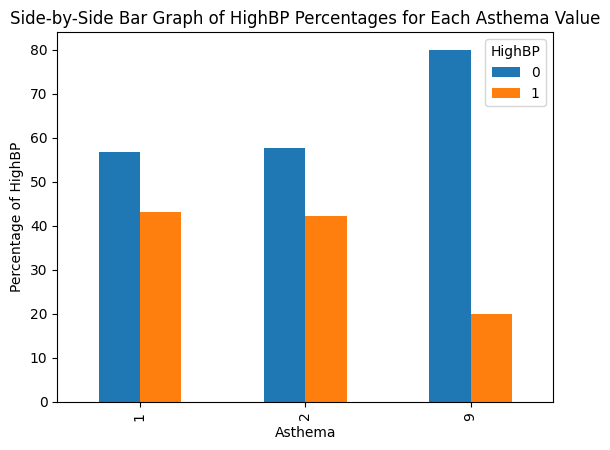

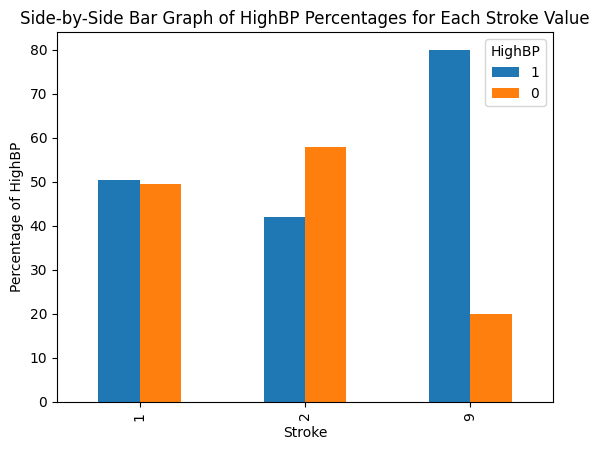

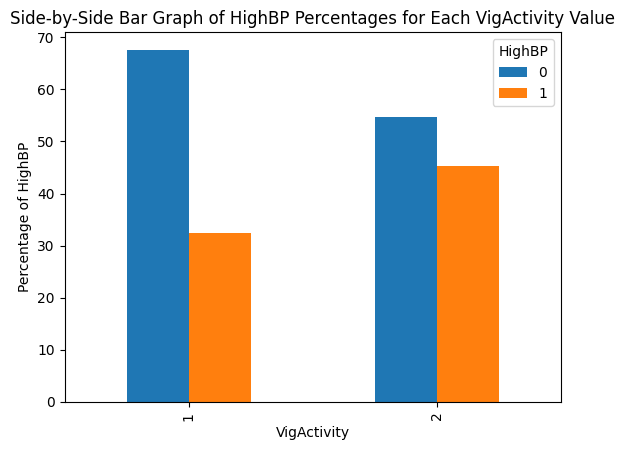

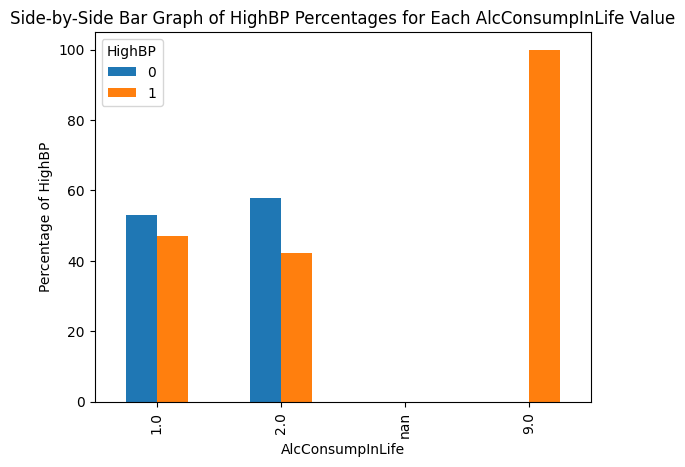

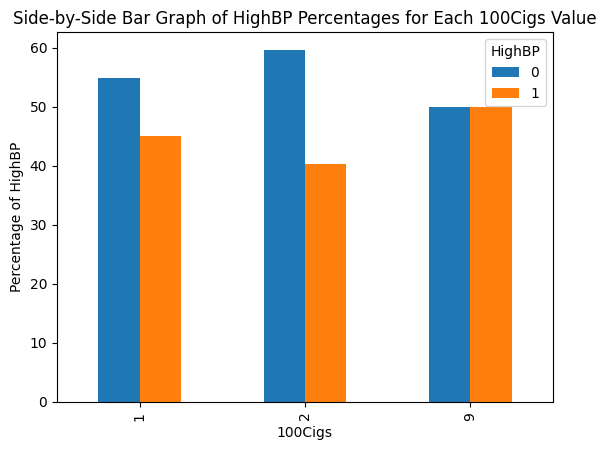

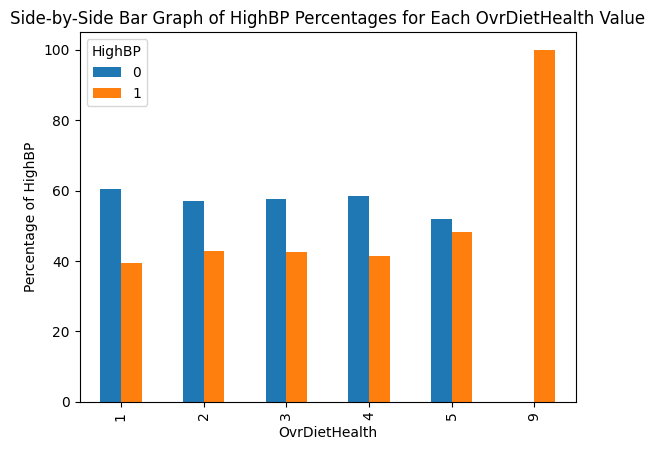

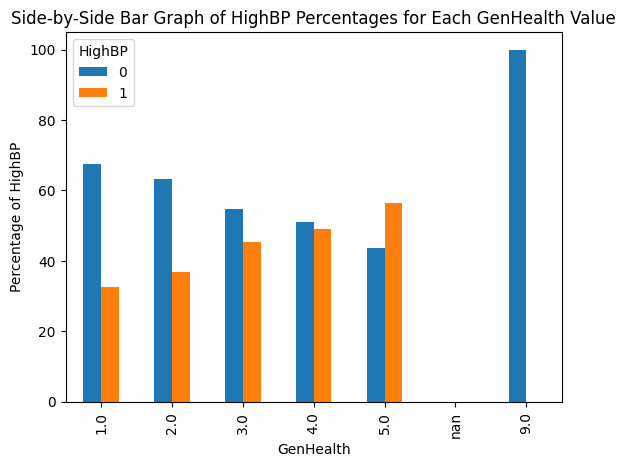

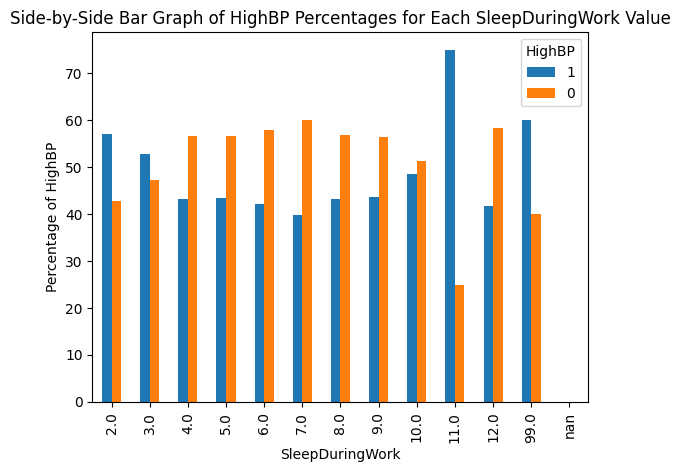

In [53]:
plot_highbp_percentages('Gender')

plot_highbp_percentages('Diet')

plot_highbp_percentages('Asthema')

plot_highbp_percentages('Stroke')

plot_highbp_percentages('VigActivity')

plot_highbp_percentages('AlcConsumpInLife')

plot_highbp_percentages('100Cigs')

plot_highbp_percentages('OvrDietHealth')

plot_highbp_percentages('GenHealth')

plot_highbp_percentages('SleepDuringWork')

